In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_folder = '/Users/ayesh/Downloads/pull/complete_data/usable/'

#path = '/Users/ayesh/Desktop/Fearmap_data/rotation_project/data/'
 
behav_files = [f for f in listdir(df_folder) if isfile(join(df_folder, f))]

csv_list = []

for a in behav_files:
    if a[-4:] == ".csv":
        csv_list.append(df_folder + a)

# AB3 and BC controlled _________________________________

In [3]:
#df = print(df.replace(r'^\s*$', np.nan, regex=True))

subid = []
avg_AB1_neu = []
avg_AB2_neu = []
avg_AB3_neu = []
avg_BC_neu = []
avg_AC_neu = []
avg_ABfinal_neu = []
avg_BCfinal_neu = []

avg_AB1_emo = []
avg_AB2_emo = []
avg_AB3_emo = []
avg_BC_emo = []
avg_AC_emo = []
avg_ABfinal_emo = []
avg_BCfinal_emo = []

for pt_file in csv_list:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr
    finalABcorr = df.key_resp_30_corr
    finalBCcorr = df.key_resp_31_corr

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BC_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys
    finalAB_trialresp = df.key_resp_30_keys
    finalBC_trialresp = df.key_resp_31_keys
    
    AB1_trialresp_rt = df.key_resp_rt
    AB2_trialresp_rt = df.key_resp_2_rt
    AB3_trialresp_rt = df.key_resp_3_rt
    BC_trialresp_rt = df.key_resp_4_rt
    AC_trialresp_rt = df.key_resp_5_rt
    finalAB_trialresp_rt = df.key_resp_30_rt
    finalBC_trialresp_rt = df.key_resp_31_rt
    
    AB1_trialtype = df.test1_face_image
    AB2_trialtype = df.test2_face_image
    AB3_trialtype = df.test3_face_image
    BC_trialtype = df.testBC_face_image
    ACobjectcue = df.testAC_objectC_image
    ACobjectAimage = df.testAC_objectA_image
    ABfinal_trialtype = df.final1_face_image
    BCfinal_trialtype = df.final2_face_image
    
    AB3_objecttype = df.test3_objectA_image
    BC_objecttype = df.testBC_objectC_image

    
    ACobjectA = df.orig_objectA_image
    ACobjectC = df.objectC_image4
    overlapB_faceimage = df.face_image4
    overlap_list = []
    emo_faced = []
    neu_faced = []
    test = []
    
    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_ACtrials = []
    t_finalABtrials = []
    t_finalBCtrials = []
    
    fear_AB1trials = []
    fear_AB2trials = []
    fear_AB3trials = []
    fear_BCtrials = []
    fear_ACtrials = []
    fear_finalABtrials = []
    fear_finalBCtrials = []
    
    neut_AB1trials = []
    neut_AB2trials = []
    neut_AB3trials = []
    neut_BCtrials = []
    neut_ACtrials = []
    neut_finalABtrials = []
    neut_finalBCtrials = []
    
    f_AB1corr = []
    f_AB2corr = []
    f_AB3corr = []
    f_BCcorr = []
    f_ACcorr = []
    f_finalABcorr = []
    f_finalBCcorr = []
    
    n_AB1corr = []
    n_AB2corr = []
    n_AB3corr = []
    n_BCcorr = []
    n_ACcorr = []
    n_finalABcorr = []
    n_finalBCcorr = []
            
    for index, row in df.iterrows():
        valence3 = AB3_trialtype[index]
        valenceBC = BC_trialtype[index]
        
        if np.isnan(AB3_trialresp[index]) == False:
            if valence3[2:6] == 'fear':
                fear_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    f_AB3corr.append(AB3_objecttype[index])
            elif valence3[2:6] == 'neut':
                neut_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    n_AB3corr.append(AB3_objecttype[index])
        ######################################################################

        if np.isnan(BC_trialresp[index]) == False:
            if valenceBC[2:6] == 'fear':
                fear_BCtrials.append(BC_trialresp_rt[index])
                if BCcorr[index] == 1:
                    f_BCcorr.append(BC_objecttype[index])
            elif valenceBC[2:6] == 'neut':
                neut_BCtrials.append(BC_trialresp_rt[index])
                if BCcorr[index] == 1:
                    n_BCcorr.append(BC_objecttype[index])
    ##############################################################################
    ## THE AC TEST!! 
    
    for index, row in df.iterrows():
        if pd.isnull(ACobjectC[index]) == False:
            overlap_valence = overlapB_faceimage[index]
            if overlap_valence[2:6] == 'fear':
                emo_faced.append(ACobjectC[index])
            if overlap_valence[2:6] == 'neut':
                neu_faced.append(ACobjectC[index]) 
    
    for index, row in df.iterrows():         
        if ACobjectcue[index] in emo_faced and ACobjectcue[index] in f_BCcorr and ACobjectAimage[index] in f_AB3corr:
            fear_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                f_ACcorr.append(AC_trialresp_rt[index])
                
        if ACobjectcue[index] in neu_faced and ACobjectcue[index] in n_BCcorr and ACobjectAimage[index] in n_AB3corr:
            neut_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                n_ACcorr.append(AC_trialresp_rt[index]) 
    try:   
        prop_correctAC_emo = len(f_ACcorr)/24
        prop_correctAC_neut = len(n_ACcorr)/24
    except:
        pass

    subid.append(participant_name)

    
    avg_AC_neu.append(prop_correctAC_neut)
    avg_AC_emo.append(prop_correctAC_emo)

In [5]:
len(fear_ACtrials)

18

In [6]:
avg_AC_emo

[0.4583333333333333,
 0.16666666666666666,
 0.2916666666666667,
 0.25,
 0.2916666666666667,
 0.5416666666666666,
 0.125,
 0.16666666666666666,
 0.625,
 0.16666666666666666,
 0.20833333333333334,
 0.625,
 0.08333333333333333,
 0.5,
 0.6666666666666666,
 0.25,
 0.20833333333333334,
 0.2916666666666667,
 0.08333333333333333,
 0.25,
 0.2916666666666667,
 0.375,
 0.08333333333333333,
 0.041666666666666664,
 0.375,
 0.16666666666666666,
 0.7083333333333334,
 0.16666666666666666,
 0.25,
 0.5416666666666666]

In [7]:
cntrl_df = pd.DataFrame(list(zip(subid, avg_AC_neu, avg_AC_emo)), 
                     columns = ['participant', 'Avg AC', 'Avg AC_emo'])

cntrl_df
cntrl_df.to_csv(r'/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/srcAB3BC_inference.csv', index = False, header = True)

In [8]:
cntrl_df2 = pd.melt(cntrl_df, id_vars=['participant'], value_vars=['Avg AC', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
cntrl_df2

,participant,condition,Total_acc
0,A0017268R9SKD8U2Y3F,Avg AC,0.541667
1,A12HWPFXQPITHD,Avg AC,0.333333
2,A16G6PPH1INQL8,Avg AC,0.291667
3,A1C5SQZ045W0L5,Avg AC,0.500000
4,A1IFIK8J49WBER,Avg AC,0.541667
5,A2AZYU1CT24O0K,Avg AC,0.625000
6,A2F1AA15HG0FRU,Avg AC,0.333333
7,A2RVFMCKSSEHDV,Avg AC,0.166667
8,A2UOSEPGNUITM8,Avg AC,0.666667
9,A2Y0WNHMT4PZ4C,Avg AC,0.250000


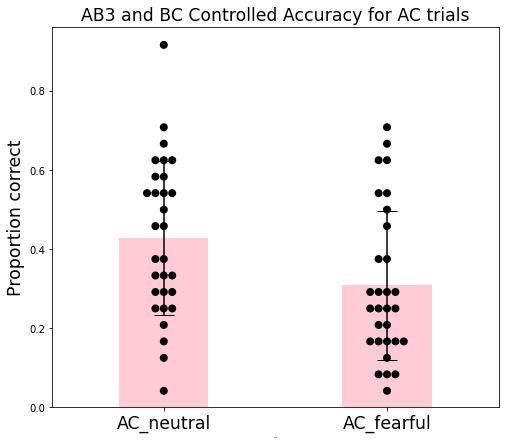

In [9]:
neuAC_mean = np.mean(avg_AC_neu)
emoAC_mean = np.mean(avg_AC_emo)


neuAC_std = np.std(avg_AC_neu)
emoAC_std = np.std(avg_AC_emo)



# Define labels, positions, bar heights and error bar heights
labels = ['AC_neutral', 'AC_fearful']
x_pos = np.arange(len(labels))
CTEs = [neuAC_mean, emoAC_mean]
error = [neuAC_std, emoAC_std]

# Build the plot
fig, ax = plt.subplots(figsize=(8,7))
sns.swarmplot(data=cntrl_df2, y = 'Total_acc', x = 'condition', color = 'black', size = 8, ax = ax)

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.8,
       width=0.4,
       color='pink',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Proportion correct', fontsize = 'xx-large')
ax.set_xlabel('Test', fontsize = 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 'xx-large')
ax.set_title('AB3 and BC Controlled Accuracy for AC trials', fontsize = 'xx-large')

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'

# ABfinal and BCfinal controlled

In [14]:
#df = print(df.replace(r'^\s*$', np.nan, regex=True))

subid = []
avg_AB1_neu = []
avg_AB2_neu = []
avg_AB3_neu = []
avg_BC_neu = []
avg_AC_neu = []
avg_ABfinal_neu = []
avg_BCfinal_neu = []

avg_AB1_emo = []
avg_AB2_emo = []
avg_AB3_emo = []
avg_BC_emo = []
avg_AC_emo = []
avg_ABfinal_emo = []
avg_BCfinal_emo = []

for pt_file in csv_list:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr
    finalABcorr = df.key_resp_30_corr
    finalBCcorr = df.key_resp_31_corr

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BC_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys
    finalAB_trialresp = df.key_resp_30_keys
    finalBC_trialresp = df.key_resp_31_keys
    
    AB1_trialresp_rt = df.key_resp_rt
    AB2_trialresp_rt = df.key_resp_2_rt
    AB3_trialresp_rt = df.key_resp_3_rt
    BC_trialresp_rt = df.key_resp_4_rt
    AC_trialresp_rt = df.key_resp_5_rt
    finalAB_trialresp_rt = df.key_resp_30_rt
    finalBC_trialresp_rt = df.key_resp_31_rt
    
    AB1_trialtype = df.test1_face_image
    AB2_trialtype = df.test2_face_image
    AB3_trialtype = df.test3_face_image
    BC_trialtype = df.testBC_face_image
    ACobjectcue = df.testAC_objectC_image
    ACobjectAimage = df.testAC_objectA_image
    ABfinal_trialtype = df.final1_face_image
    BCfinal_trialtype = df.final2_face_image
    
    finalAB_objecttype = df.final1_objectA_image
    finalBC_objecttype = df.final2_objectC_image

    
    ACobjectA = df.orig_objectA_image
    ACobjectC = df.objectC_image4
    overlapB_faceimage = df.face_image4
    overlap_list = []
    emo_faced = []
    neu_faced = []
    test = []
    
    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_ACtrials = []
    t_finalABtrials = []
    t_finalBCtrials = []
    
    fear_AB1trials = []
    fear_AB2trials = []
    fear_AB3trials = []
    fear_BCtrials = []
    fear_ACtrials = []
    fear_finalABtrials = []
    fear_finalBCtrials = []
    
    neut_AB1trials = []
    neut_AB2trials = []
    neut_AB3trials = []
    neut_BCtrials = []
    neut_ACtrials = []
    neut_finalABtrials = []
    neut_finalBCtrials = []
    
    f_AB1corr = []
    f_AB2corr = []
    f_AB3corr = []
    f_BCcorr = []
    f_ACcorr = []
    f_finalABcorr = []
    f_finalBCcorr = []
    
    n_AB1corr = []
    n_AB2corr = []
    n_AB3corr = []
    n_BCcorr = []
    n_ACcorr = []
    n_finalABcorr = []
    n_finalBCcorr = []
            
    for index, row in df.iterrows():
        valence3 = ABfinal_trialtype[index]
        valenceBC = BCfinal_trialtype[index]
        
           ######################################################################

        if np.isnan(finalBC_trialresp[index]) == False:
            if valenceBC[2:6] == 'fear':
                fear_finalBCtrials.append(finalBC_trialresp_rt[index])
                if finalBCcorr[index] == 1:
                    f_finalBCcorr.append(finalBC_objecttype[index])
            elif valenceBC[2:6] == 'neut':
                neut_finalBCtrials.append(finalBC_trialresp_rt[index])
                if finalBCcorr[index] == 1:
                    n_finalBCcorr.append(finalBC_objecttype[index])
        
        ######################################################################
 
        if np.isnan(finalAB_trialresp[index]) == False:
            if valence3[2:6] == 'fear':
                fear_finalABtrials.append(finalAB_trialresp_rt[index])
                if finalABcorr[index] == 1:
                    f_finalABcorr.append(finalAB_objecttype[index])
            elif valence3[2:6] == 'neut':
                neut_finalABtrials.append(finalAB_trialresp_rt[index])
                if finalABcorr[index] == 1:
                    n_finalABcorr.append(finalAB_objecttype[index])
     
    ##############################################################################
    ## THE AC TEST!! 
    
    for index, row in df.iterrows():
        if pd.isnull(ACobjectC[index]) == False:
            overlap_valence = overlapB_faceimage[index]
            if overlap_valence[2:6] == 'fear':
                emo_faced.append(ACobjectC[index])
            if overlap_valence[2:6] == 'neut':
                neu_faced.append(ACobjectC[index]) 
    
    for index, row in df.iterrows():         
        if ACobjectcue[index] in emo_faced and ACobjectcue[index] in f_finalBCcorr and ACobjectAimage[index] in f_finalABcorr:
            fear_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                f_ACcorr.append(AC_trialresp_rt[index])
                
        if ACobjectcue[index] in neu_faced and ACobjectcue[index] in n_finalBCcorr and ACobjectAimage[index] in n_finalABcorr:
            neut_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                n_ACcorr.append(AC_trialresp_rt[index]) 
    try:   
        prop_correctAC_emo = len(f_ACcorr)/24
        prop_correctAC_neut = len(n_ACcorr)/24
    except:
        pass

    subid.append(participant_name)

    
    avg_AC_neu.append(prop_correctAC_neut)
    avg_AC_emo.append(prop_correctAC_emo)

In [15]:
cntrl_df3 = pd.DataFrame(list(zip(subid, avg_AC_neu, avg_AC_emo)), 
                     columns = ['participant', 'Avg AC', 'Avg AC_emo'])

cntrl_df3.to_csv(r'/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/srcFinalABBC_inference.csv', index = False, header = True)
cntrl_df3

,participant,Avg AC,Avg AC_emo
0,A0017268R9SKD8U2Y3F,0.416667,0.583333
1,A12HWPFXQPITHD,0.250000,0.291667
2,A16G6PPH1INQL8,0.375000,0.333333
3,A1C5SQZ045W0L5,0.541667,0.291667
4,A1IFIK8J49WBER,0.416667,0.375000
5,A2AZYU1CT24O0K,0.625000,0.583333
6,A2F1AA15HG0FRU,0.291667,0.125000
7,A2RVFMCKSSEHDV,0.041667,0.083333
8,A2UOSEPGNUITM8,0.583333,0.625000
9,A2Y0WNHMT4PZ4C,0.125000,0.125000


In [16]:
cntrl_df4 = pd.melt(cntrl_df3, id_vars=['participant'], value_vars=['Avg AC', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
cntrl_df4

,participant,condition,Total_acc
0,A0017268R9SKD8U2Y3F,Avg AC,0.416667
1,A12HWPFXQPITHD,Avg AC,0.250000
2,A16G6PPH1INQL8,Avg AC,0.375000
3,A1C5SQZ045W0L5,Avg AC,0.541667
4,A1IFIK8J49WBER,Avg AC,0.416667
5,A2AZYU1CT24O0K,Avg AC,0.625000
6,A2F1AA15HG0FRU,Avg AC,0.291667
7,A2RVFMCKSSEHDV,Avg AC,0.041667
8,A2UOSEPGNUITM8,Avg AC,0.583333
9,A2Y0WNHMT4PZ4C,Avg AC,0.125000


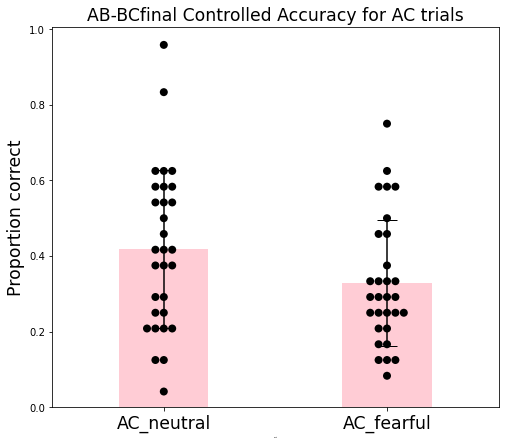

In [17]:
neuAC_mean = np.mean(avg_AC_neu)
emoAC_mean = np.mean(avg_AC_emo)


neuAC_std = np.std(avg_AC_neu)
emoAC_std = np.std(avg_AC_emo)



# Define labels, positions, bar heights and error bar heights
labels = ['AC_neutral', 'AC_fearful']
x_pos = np.arange(len(labels))
CTEs = [neuAC_mean, emoAC_mean]
error = [neuAC_std, emoAC_std]

# Build the plot
fig, ax = plt.subplots(figsize=(8,7))
sns.swarmplot(data=cntrl_df4, y = 'Total_acc', x = 'condition', color = 'black', size = 8, ax = ax)

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.8,
       width=0.4,
       color='pink',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Proportion correct', fontsize = 'xx-large')
ax.set_xlabel('Test', fontsize = 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 'xx-large')
ax.set_title('AB-BCfinal Controlled Accuracy for AC trials', fontsize = 'xx-large')

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'